<a href="https://colab.research.google.com/github/SeifAmr1/Iphone_Purchase/blob/main/ML_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# **Loading and Preprocessing**

In [ ]:
# Load the dataset
df = pd.read_csv('Iphone_purchase.csv')


# Drop the 'User ID' column
df.drop('User ID', axis=1, inplace=True)

# Preprocess the data

# Encoding categorical column 'Gender'

labelEncoder = LabelEncoder()
labelEncoder.fit(df["Gender"])
df["Gender"] = labelEncoder.transform(df["Gender"])

# Splitting the data into features (X) and target variable (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature scaling using StandardScaler
scalerr = StandardScaler()
X_train_scaled = scalerr.fit_transform(X_train_smote)
X_test_scaled = scalerr.transform(X_test)


# Scaling using MinMaxScaler, normalizing balanced classes gives same accuracies
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_smote)
X_test_normalized = scaler.transform(X_test)



## **Naive Bayes Classification**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('Iphone_purchase.csv')

# Drop the 'User ID' column
df.drop('User ID', axis=1, inplace=True)

# Preprocess the data
# Encoding categorical column 'Gender'
labelEncoder = LabelEncoder()
df["Gender"] = labelEncoder.fit_transform(df["Gender"])

# Splitting the data into features (X) and target variable (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Separate continuous and categorical features
continuous_features = ['Age', 'EstimatedSalary']
categorical_feature = ['Gender']

X_train_continuous = X_train_smote[continuous_features]
X_test_continuous = X_test[continuous_features]

X_train_categorical = X_train_smote[categorical_feature]
X_test_categorical = X_test[categorical_feature]

# Scale continuous features
scaler = StandardScaler()
X_train_continuous_scaled = scaler.fit_transform(X_train_continuous)
X_test_continuous_scaled = scaler.transform(X_test_continuous)


# scaler = MinMaxScaler()
# X_train_continous_normalized = scaler.fit_transform(X_train_smote)
# X_test_continous_normalized = scaler.transform(X_test)

# Define parameter grid for smoothing hyperparameter tuning
param_grid_gnb = {'var_smoothing': np.logspace(0, -9, num=100)}
param_grid_cnb = {'alpha': np.logspace(0, -9, num=100)}

# Perform GridSearchCV for GaussianNB
gnb = GaussianNB()
grid_search_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb.fit(X_train_continuous_scaled, y_train_smote)
best_gnb = grid_search_gnb.best_estimator_

# Perform GridSearchCV for CategoricalNB
cnb = CategoricalNB()
grid_search_cnb = GridSearchCV(estimator=cnb, param_grid=param_grid_cnb, cv=5, scoring='accuracy')
grid_search_cnb.fit(X_train_categorical, y_train_smote)
best_cnb = grid_search_cnb.best_estimator_

# Predict probabilities for continuous features using the best GNB model
gnb_proba = best_gnb.predict_proba(X_test_continuous_scaled)

# Predict probabilities for categorical features using the best CNB model
cnb_proba = best_cnb.predict_proba(X_test_categorical)

# Combine the probabilities (product of probabilities)
combined_proba = gnb_proba * cnb_proba

# Predict the class with the highest combined probability
y_pred = np.argmax(combined_proba, axis=1)

# Evaluate the model
NB_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Naive Bayes Classifier Accuracy: {NB_accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Naive Bayes Classifier Accuracy: 95.00%
Confusion Matrix:
[[49  3]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.90      0.96      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



# **KNN Classifier**

In [ ]:

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=2, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_normalized, y_train_smote)

# Get the best hyperparameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Test the best KNN classifier on the test set
best_knn_classifier = grid_search.best_estimator_
best_knn_predictions = best_knn_classifier.predict(X_test_normalized)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)
print("Best KNN Classifier Accuracy on Test Set:", best_knn_accuracy)

# using manual tuning gave 95 accuracy but i used gridsearch for generalization and scalability


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Accuracy: 0.9243902439024391
Best KNN Classifier Accuracy on Test Set: 0.9375


## Visualization

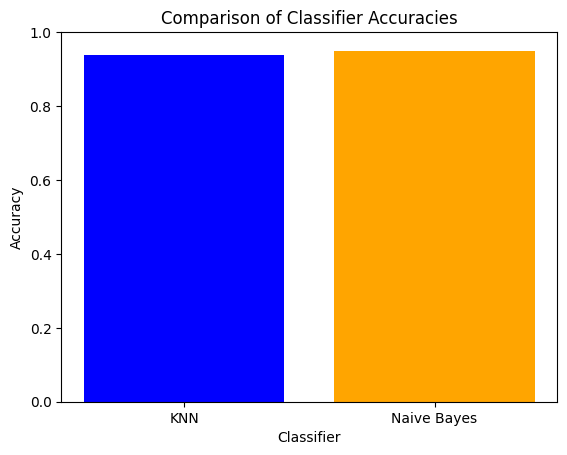

In [ ]:
classifiers = ['KNN', 'Naive Bayes']
accuracies = [best_knn_accuracy, NB_accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()

## Detect Outliers